# Transforming Data with Pandas

Module 3/6 for data cleaning and analysis

## 1. Introduction

In this mission we are going to continue working with the World Happiness Report and explore the factors that contribute to happiness.

You may recall from previous missions that each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

Throughout this mission, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

Which of the factors above contribute the most to the happiness score?

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:
- Series.map()
- Series.apply()
- DataFrame.applymap()
- DataFrame.apply()
- pd.melt()

We'll focus just on the 2015 report in this mission.

Below are descriptions for some of the other columns we'll work with in this mission:

- Country - Name of the country
- Region - Name of the region the country belongs to
- Happiness Rank - The rank of the country, as determined by its happiness score
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- Dystopia Residual- Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column - you won't need in depth knowledge of it to complete this mission.


In [1]:
# We're gonna start by renaming some of the columns in happiness 2015
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

happiness2015 = pd.read_csv('World_Happiness_2015.csv')

#This is a dictionary for renaming columns
mapping = {'Economy (GDP per Capita)': 'Economy',
           'Health (Life Expectancy)': 'Health',
           'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis=1)

## 2. Apply a Function Element-wise Using the Map and Apply Methods

What we noticed is that all the factors columns are number values. We know that each number represents the exten to which each factor contributes to the happiness score.

In order to make this a bit easier to understand we can convert the these numbers to categories that indicate wheter the factor has a high impact on the happiness score or a low impact using the following function:

In [2]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

Although pandas provides many built-in functions for common data cleaning tasks, in this case, the tranformation we need to perform is so specific to our data that one doesn't exist. Luckily, pandas has a couple methods that can be used to apply a custom function like the one above to our data, starting with the following two methods:

1. Series.map() method
2. Series.apply() method

Both methods above apply a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

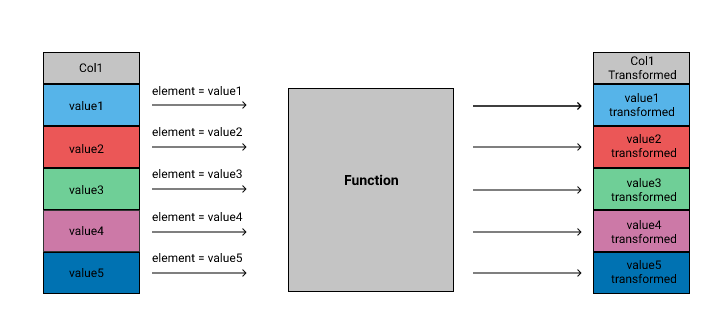

Syntax for both:

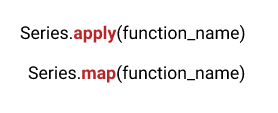

Both methods take a function as a parameter so because of this it gets pass into the funciton without the parantheses.

In [ ]:
# For example, if we were working with a function called 
# transform, we'd pass it into the apply() method as follows:

def transform(val):
    return val
Series.apply(transform)


In [6]:
# Let's compare the 2

# Series.map()
economy_impact_map = happiness2015['Economy'].map(label)

In [7]:
# Series.apply()
economy_impact_apply = happiness2015['Economy'].apply(label)

In [9]:
equal = economy_impact_map.equals(economy_impact_apply)
print(equal)

True


## 3. Apply a Function Element-wise Using the Map and Apply Methods (Continued)

We applied a function to the Economy column using the Series.map() and Series.apply() methods and confirmed that both methods produce the same results.

These methods don't modify the original series. If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column. We recommend creating a new column, in case you need to reference the original values:

In [10]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)


    

To create the Economy Impact column, map() and apply() iterate through the Economy column and pass each value into the label function. The function evaluates which range the value belongs to and assigns the corresponding value to the element in the new column.

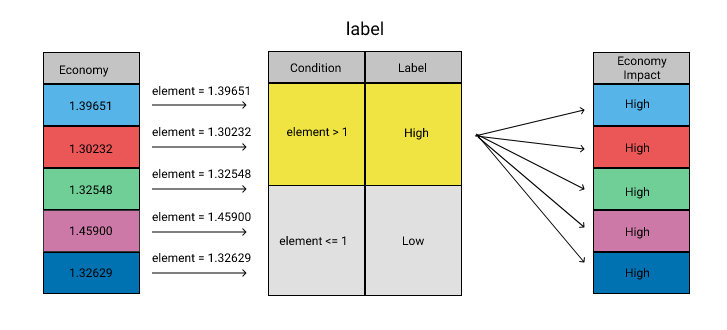

Since both map and apply can apply functions element-wise to a series, you may be wondering about the difference between them. Let's start by looking at a function with arguments.

In the label function, we arbitrarily split the values into 'High' and 'Low'. What if instead we allowed that number to be passed into the function as an argument?

In [11]:
def label(element, x):
    if elment > x:
        return 'High'
    else:
        return 'Low'
eoconomy_map = happiness2015['Economy'].map(label, x = .8)

TypeError: map() got an unexpected keyword argument 'x'

In [13]:
# When we try to apply the function to the Economy column with 
# the map method, we get an error

# Let's confirm how the apply() method works
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x = .8)

## 4. Apply a Function Element-wise to Multiple Columns Using Applymap Method

We learned in the last screen that we can only use the Series.apply() method to apply a function with additoinal arguments element-wise - the Series.map() method will return an error.

So far, we've transformed just one column at a time. If we wanted to transform more than one column, we could use the Series.map() or Series.apply() method to transform them as follows:

In [14]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)
happiness2015['Health Impact'] = happiness2015['Health'].apply(label)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label)

However, it would be easier to just apply the same function to all of the factor columns (Economy, Health, Family, Freedom, Generosity, Trust) at once. Fortunately, however, pandas already has a method that can apply functions element-wise to multiple columns at once - the DataFrame.applymap() method.

We'll use the following syntax to work with the df.applymap() method:

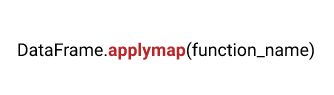

Just like with the Series.map() and Series.apply() methods, we need to pass the function name into the df.applymap() method without parentheses.

In [15]:
# practice using df.applymap() method

def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 
           'Health', 'Freedom', 
           'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)

## 5. Apply Functions along an axis using the Apply Method

We've learned that we can apply a function element-wise to multiple columns using the df.applymap() method.

You can also use the apply() method on a dataframe, but the DataFrame.apply() method has different capabilities. Instead of applying functions element-wise, the df.apply() method applies functions along an axis, either column-wise or row-wise. When we create a function to use with df.apply(), we set it up to accept a series, most commonly a column.

Let's use the df.apply() method to calculate the number of 'High' and 'Low' values in each column of the result from the last exercise, factors_impact. In order to do so, we'll apply the pd.value_counts function to all of the columns in the dataframe:




In [16]:
factors_impact.apply(pd.value_counts)

Economy  Family  Health  Freedom  Trust  Generosity
High       66      89       2      NaN    NaN         NaN
Low        92      69     156    158.0  158.0       158.0

Now, we can easily see that the Family and Economy columns contain the most 'High' values!

When we applied the pd.value_counts function to factors_impact, it calculated the value counts for the first column, Economy, then the second column, Family, so on and so forth:

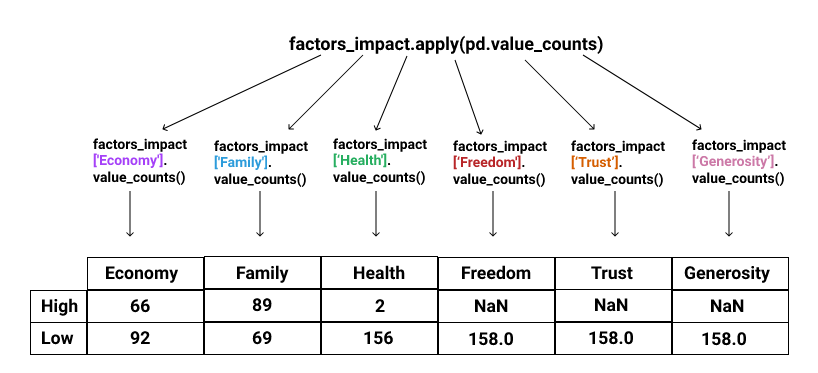



Notice that we used the df.apply() method to transform multiple columns. This is only possible because the pd.value_counts function operates on a series. If we tried to use the df.apply() method to apply a function that works element-wise to multiple columns, we'd get an error:

In [17]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015[factors].apply(label)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index Economy')

In [19]:
# Some practice with df.apply()
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)

## 6. Apply Functions along an axis using the Apply Method (continued)

 general, we should only use the apply() method when a vectorized function does not exist. Recall that pandas uses vectorization, the process of applying operations to whole series at once, to optimize performance. When we use the apply() method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the apply() method.

Next, we'll compare two different ways of performing an analysis task. First, we'll use the df.apply() method to transform the data. Then, we'll look at an alternate way to perform the same task with vectorized methods.

One thing you probably didn't notice about the factor columns is that the sum of the six factors and the Dystopia Residual column equals the happiness score:

In [20]:
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)

#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

Happiness Score  Factors Sum
0            7.587      7.58696
1            7.561      7.56092
2            7.527      7.52708
3            7.522      7.52222
4            7.427      7.42694

The values we calculated in the Factors Sum column are slightly different than the values in the Happiness Score column, but the differences are so minor that we can attribute them to rounding. Because the sum of the seven columns equal the happiness score, we can convert them to percentages and analyze them as proportions of the happiness score instead.

Let's use the df.apply() method to convert each of the values in the six factor columns and the Dystopia Residual column to percentages.

In [22]:
factors = ['Economy', 'Family', 'Health', 
           'Freedom', 'Trust', 'Generosity', 
           'Dystopia Residual']
def percentages(col):
    div = col/happiness2015['Happiness Score']
    return div * 100
factor_percentages = happiness2015[factors].apply(percentages)

## 7. Reshaping Data with the Melt Function

It would be easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the Dystopia Residual column. We can accomplish this with the pd.melt() function.

Here's a summary of the syntax for melt:
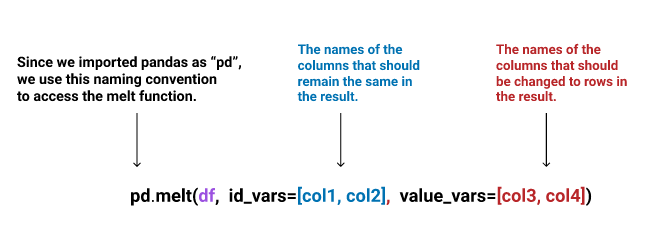

In [29]:
main_cols = ['Country', 'Region', 
             'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 
           'Health', 'Freedom', 
           'Trust', 'Generosity', 
           'Dystopia Residual']
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)
melt

Country                           Region  \
0                  Switzerland                   Western Europe   
1                      Iceland                   Western Europe   
2                      Denmark                   Western Europe   
3                       Norway                   Western Europe   
4                       Canada                    North America   
5                      Finland                   Western Europe   
6                  Netherlands                   Western Europe   
7                       Sweden                   Western Europe   
8                  New Zealand        Australia and New Zealand   
9                    Australia        Australia and New Zealand   
10                      Israel  Middle East and Northern Africa   
11                  Costa Rica      Latin America and Caribbean   
12                     Austria                   Western Europe   
13                      Mexico      Latin America and Caribbean   
14               United States                    North America   
15                      Brazil      Latin America and Caribbean   
16                  Luxembourg                   Western Europe   
17                     Ireland                   Western Europe   
18                     Belgium                   Western Europe   
19        United Arab Emirates  Middle East and Northern Africa   
20              United Kingdom                   Western Europe   
21                        Oman  Middle East and Northern Africa   
22                   Venezuela      Latin America and Caribbean   
23                   Singapore                Southeastern Asia   
24                      Panama      Latin America and Caribbean   
25                     Germany                   Western Europe   
26                       Chile      Latin America and Caribbean   
27                       Qatar  Middle East and Northern Africa   
28                      France                   Western Europe   
29                   Argentina      Latin America and Caribbean   
...                        ...                              ...   
1076                   Myanmar                Southeastern Asia   
1077                   Georgia       Central and Eastern Europe   
1078                    Malawi               Sub-Saharan Africa   
1079                 Sri Lanka                    Southern Asia   
1080                  Cameroon               Sub-Saharan Africa   
1081                  Bulgaria       Central and Eastern Europe   
1082                     Egypt  Middle East and Northern Africa   
1083                     Yemen  Middle East and Northern Africa   
1084                    Angola               Sub-Saharan Africa   
1085                      Mali               Sub-Saharan Africa   
1086       Congo (Brazzaville)               Sub-Saharan Africa   
1087                   Comoros               Sub-Saharan Africa   
1088                    Uganda               Sub-Saharan Africa   
1089                   Senegal               Sub-Saharan Africa   
1090                     Gabon               Sub-Saharan Africa   
1091                     Niger               Sub-Saharan Africa   
1092                  Cambodia                Southeastern Asia   
1093                  Tanzania               Sub-Saharan Africa   
1094                Madagascar               Sub-Saharan Africa   
1095  Central African Republic               Sub-Saharan Africa   
1096                      Chad               Sub-Saharan Africa   
1097                    Guinea               Sub-Saharan Africa   
1098               Ivory Coast               Sub-Saharan Africa   
1099              Burkina Faso               Sub-Saharan Africa   
1100               Afghanistan                    Southern Asia   
1101                    Rwanda               Sub-Saharan Africa   
1102                     Benin               Sub-Saharan Africa   
1103                     Syria  Middle East and Northern Africa   
110

In [31]:
Percentage = round(melt['value']/melt['Happiness Score']* 100, 2 )

## 8. Challenge: Aggregate the Data and Create a Visualization

The melt function moved the values in the seven columns - Economy, Health, Family, Freedom, Generosity, Trust, and Dystopia Residual - to the same column, which meant we could transform them all at once.

You may have also noticed that now the data is in a format that makes it easier to aggregate. We refer to data in this format as tidy data. If you're interested in learning more about the tidy format, you can read about it here.

Next, let's group the data by the variable column, find the mean value of each variable (or factor), and plot the results to see how much each factor contributes to the happiness score on average. In the last mission, we combined the 2015, 2016, and 2017 reports, aggregated the data by the Year column using the df.pivot_table() method, and then plotted the results as follows:

In [ ]:
#Concatenate happiness2015, happiness2016, and happiness2017.
combined = pd.concat([happiness2015, happiness2016, happiness2017])

#Create a pivot table listing the mean happiness score for each year. Since the default aggregation function is the mean, we excluded the `aggfunc` argument.
pivot_table_combined = combined.pivot_table(index = 'Year', values = 'Happiness Score')

#Plot the pivot table.
pivot_table_combined.plot(kind ='barh', title='Mean Happiness Scores by Year', xlim = (0,10))

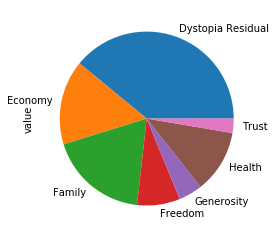

In [32]:
# we'll group the data by the variable column instead of the 
# Year column and plot the results using a pie chart.
pv_melt = melt.pivot_table(index = 'variable', values = 'value')

pv_melt.plot(kind ='pie', y='value', legend=False)



In this mission, we learned how to transform data using the Series.map(), Series.apply(), DataFrame.apply(), and DataFrame.applymap() methods along with the pd.melt() function. Below is a summary chart of the differences between the map(), apply(), and applymap() methods:

|Method |Series or Dataframe Method	|Applies Functions Element-wise?|
|-------|---------------------------|-------------------------------|
|Map    |Series |	Yes|
|Apply	|Series	|Yes|
|Applymap|	Dataframe	|Yes|
|Apply	|Dataframe	|No, applies functions along an axis|


As you explore pandas, you'll also find that pandas has a method to "un-melt" the data, or transform rows into columns. This method is called the df.pivot() method, not to be confused with the df.pivot_table() method used to aggregate data. Although we couldn't cover the df.pivot() method explicitly in this mission, we encourage you to explore it on your own.

